This is the code for what RK4 Integration should look like with a fixed step size. Will adapt it for adaptive step size next!

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [171]:
def f(r,t):
    """
    For some given function with an input r and timestep t, we output the derivative of every value,
    which is in turn used in the rk4 integration 
    """
    
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    Dx = vx
    Dy = vy
    
    R = np.sqrt(x**2 + y**2)
    
    Dvx = -G*M*x/R**3
    
    Dvy = -G*M*y/R**3
    
    
    return np.array([Dx,Dy,Dvx,Dvy])

In [172]:
a = 0
b = 100
G = M  = 1
N = 1000

h = (b-a)/N

tpoints = np.arange(a,b,h)

xpoints = []
ypoints = []
vxpoints = []
vypoints = []

r = np.array([0.0,1.0,1.0,0.0])

for t in tpoints:
    
    xpoints.append(r[0])
    ypoints.append(r[1])
    vxpoints.append(r[2])
    vypoints.append(r[3])
    
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    
    r += (k1+2*k2 + 2*k3 + k4)/6
    
    
    
    

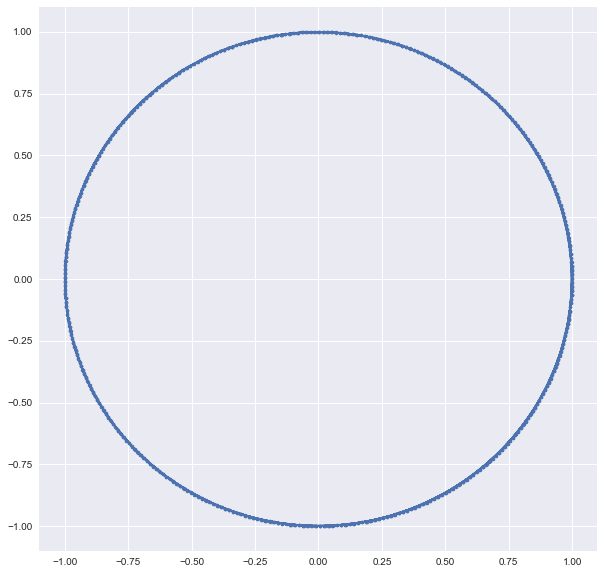

In [175]:
plt.figure(figsize=(10,10))
plt.plot(xpoints,ypoints,'-..')

Next up, implementing adaptive stepping. To start, just going to make rk4 a function since you need to evaluate it at least 3 times per step!

In [176]:
a = 0
b = 100
G = M  = 1
N = 1000

h = (b-a)/N

tpoints = np.arange(a,b,h)

xpoints = []
ypoints = []
vxpoints = []
vypoints = []

r = np.array([0.0,1.0,1.0,0.0])

for t in tpoints:
    
    xpoints.append(r[0])
    ypoints.append(r[1])
    vxpoints.append(r[2])
    vypoints.append(r[3])
    

    

    r = rk4(h=h,r=r,f=f) #update to r occurs in code. 
    
    
    

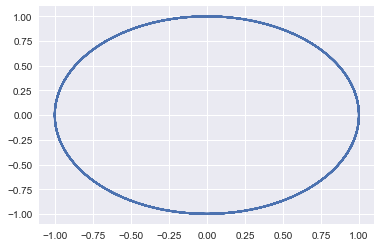

In [177]:
plt.plot(xpoints,ypoints)

Next, add the conditions for error tolerance in that step. 

In [164]:
a = 0
b = 10000
G = M  = 1
N = 100

h = (b-a)/N

tpoints = np.arange(a,b,h)

xpoints = []
ypoints = []
vxpoints = []
vypoints = []

r = np.array([0.0,1,-1,0.0])
# Set a target accyracy of delta = 1 km/yr

delta = 1e-4 # In Au/yr

def rk4(h,r,f):
    """
    RK4 Integration for some step size of h
    
    """
    
    k1 = h*f(r,t)
    k2 = h*f(r + 0.5*k1,t+0.5*h)
    k3 = h*f(r + 0.5*k2,t+0.5*h)
    k4 = h*f(r + k3,t+h)

    rout = r + (k1 + 2*k2 + 2*k3 + k4)/6 #update occurs here
    return rout
    
    
    
for t in tpoints:
    

    
    #Now, calculate error at h and 2h
    rtemp = rk4(h,r,f) #one step at this initial r with initial h val
    
    rError1 = rk4(h=h, r=rtemp, f=f) #after 2 steps    
    rError2 = rk4(h=2*h, r=r, f=f) # one step twice as far, with iniital r 
    
    
    xerror = (rError1[0] - rError2[0])/30  # 0th element -> x component
    yerror = (rError1[1] - rError2[1])/30.

    rho = h*delta/np.sqrt(xerror**2 + yerror**2)
    
    if rho > 1: 
        
        print("worked!")
        xpoints.append(r[0])
        ypoints.append(r[1])
        vxpoints.append(r[2])
        vypoints.append(r[3])
        t += h
        r = rtemp    
        r = rk4(h,r,f) 
        
    if rho < 1:
        print("adapt")
        h = h * rho**(1/4)
        
r = np.sqrt(np.power(xpoints,2) + np.power(ypoints,2))


adapt
adapt
adapt
adapt
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!


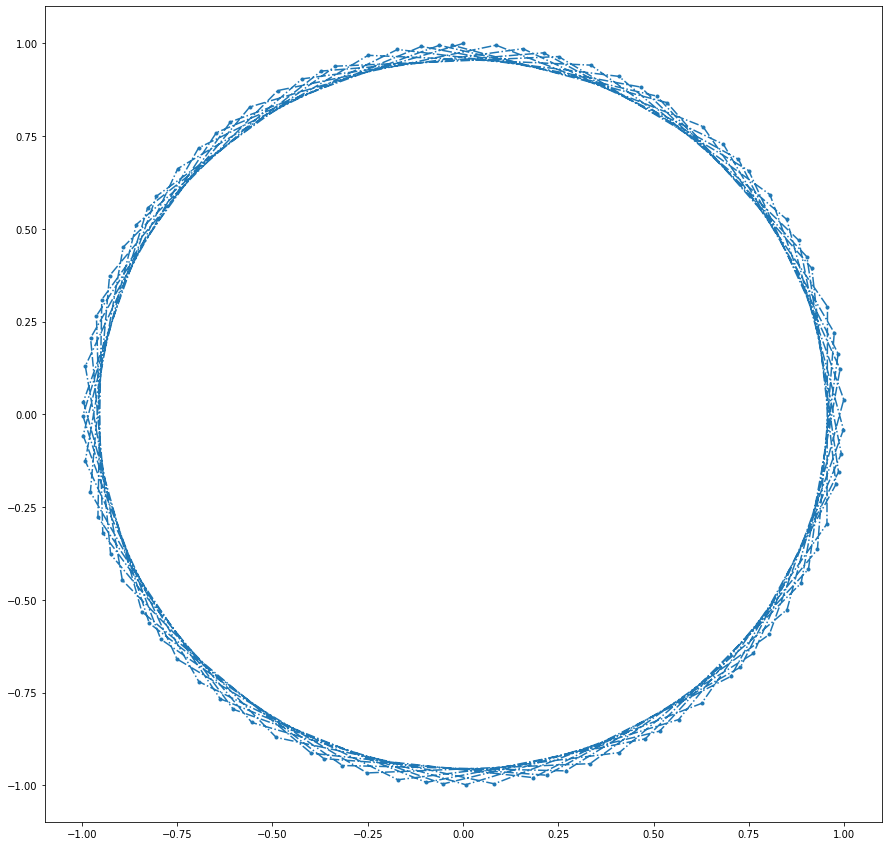

In [169]:
plt.figure(figsize=(15,15))
plt.plot(xpoints,ypoints,'-..')

In [166]:
def U(r):    
    return G*M/r

In [167]:
U = GM/r

NameError: name 'GM' is not defined

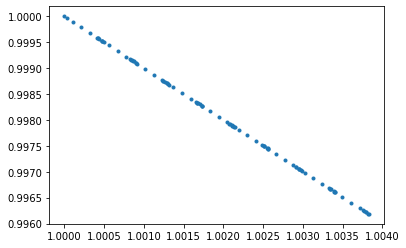

In [168]:
plt.plot(U(r),r,'.')